In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('SCALE불량.csv', encoding= 'euc-kr')
df.head(20)

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
5,PLT_1006,03JAN2023:08:01:55,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1143,127,1128,57,255,1128,TMCP(온도제어),874,8,1조
6,PLT_1007,03JAN2023:08:14:02,양품,BV-EH36-TM,프랑스,T,38,3100,16700,적용,...,1138,126,1130,50,278,1130,TMCP(온도제어),878,8,1조
7,PLT_1008,03JAN2023:08:24:12,양품,BV-EH36-TM,프랑스,T,38,3100,16700,적용,...,1139,126,1131,52,272,1131,TMCP(온도제어),870,8,1조
8,PLT_1009,03JAN2023:08:38:23,양품,BV-EH36-TM,프랑스,T,38,3100,16700,적용,...,1127,126,1122,52,241,1122,TMCP(온도제어),873,8,1조
9,PLT_1010,03JAN2023:08:45:58,불량,AB/EH36-TM,미국,T,38,3100,16200,적용,...,1135,119,1124,73,290,1124,TMCP(온도제어),881,7,1조


In [16]:
df['scale'].value_counts()

scale
양품    690
불량    310
Name: count, dtype: int64

In [17]:
# 양품이 0 , 불량이 1

df['scale'] = df['scale'].map({"양품": 0, "불량": 1})
df['scale'].value_counts()

scale
0    690
1    310
Name: count, dtype: int64

In [18]:
df.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

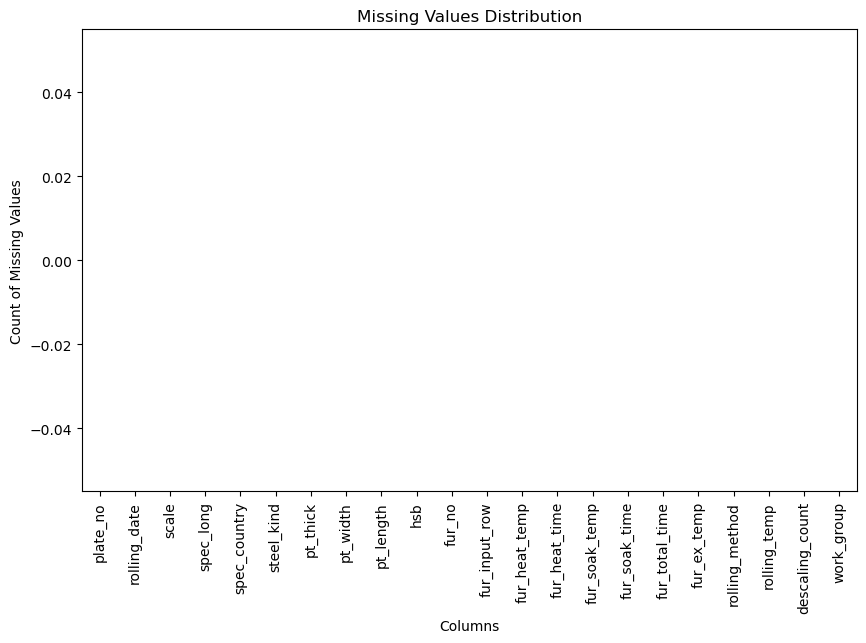

In [19]:
#결측치 시각화

missing_values = df.isnull().sum()
missing_values.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Distribution')
plt.show()


In [20]:
df.shape

(1000, 22)

In [23]:
df.describe() #수치형 변수에 대한 요약통계 

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.310000,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,1150.928000,934.637000,8.557000
std,0.462725,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,17.344384,96.598015,1.604158
min,0.000000,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,1113.000000,0.000000,5.000000
25%,0.000000,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,1135.750000,893.750000,8.000000
50%,0.000000,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,1156.000000,948.000000,9.000000
75%,1.000000,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,1164.000000,991.000000,10.000000
max,1.000000,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1185.000000,1078.000000,10.000000


In [25]:
df.describe(include = 'object') #범주형 변수에 대한 요약통계

,plate_no,rolling_date,spec_long,spec_country,steel_kind,hsb,fur_no,fur_input_row,rolling_method,work_group
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,1000,66,7,2,2,3,2,2,4
top,PLT_1001,03JAN2023:07:07:53,JS-SM490YB,영국,C,적용,3호기,1열,CR(제어압연),2조
freq,1,1,84,256,755,953,342,508,840,292


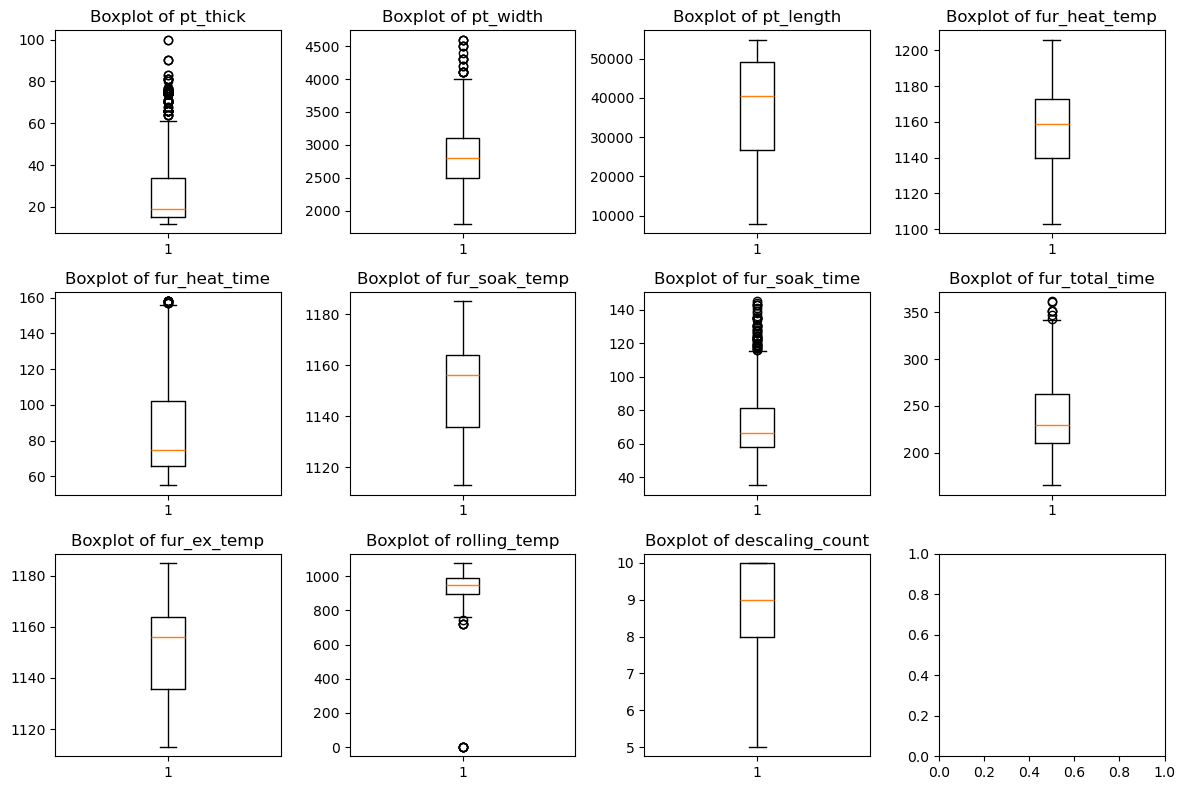

In [27]:
# 이상치 확인
variables = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp', 'fur_soak_time',
             'fur_total_time', 'fur_ex_temp', 'rolling_temp', 'descaling_count']

# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))  # 3행 4열의 subplot 생성
axes = axes.flatten()  # 2차원 배열을 1차원으로 펼치기

for i, variable in enumerate(variables):
    axes[i].boxplot(df[variable])
    axes[i].set_title(f"Boxplot of {variable}")

# subplot 간 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

In [30]:
del df['plate_no']

In [32]:
df.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [35]:
df[df['rolling_temp'] < 10]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,3호기,...,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


In [37]:
df['rolling_temp'].describe()

count    1000.000000
mean      934.637000
std        96.598015
min         0.000000
25%       893.750000
50%       948.000000
75%       991.000000
max      1078.000000
Name: rolling_temp, dtype: float64

In [43]:
# 올바른 조건식 작성
df_filtered = df[df['spec_long'] == 'GL-E36-TM']

# 필터링된 데이터프레임 확인
df_filtered.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
26,03JAN2023:11:37:34,양품,GL-E36-TM,독일,T,44,2000,27500,적용,2호기,...,1114,64,1120,82,240,1120,TMCP(온도제어),836,6,1조
27,03JAN2023:11:44:48,양품,GL-E36-TM,독일,T,44,2000,27500,적용,3호기,...,1113,124,1120,82,276,1120,TMCP(온도제어),832,6,1조
28,03JAN2023:11:59:39,양품,GL-E36-TM,독일,T,48,2100,24500,적용,3호기,...,1118,71,1124,86,216,1124,TMCP(온도제어),832,6,1조
29,03JAN2023:12:13:55,양품,GL-E36-TM,독일,T,48,2100,24500,적용,1호기,...,1117,69,1120,88,240,1120,TMCP(온도제어),832,6,1조
30,03JAN2023:12:20:57,양품,GL-E36-TM,독일,T,48,2000,25600,적용,1호기,...,1108,62,1117,97,219,1117,TMCP(온도제어),841,6,1조


In [44]:
df_filtered['rolling_temp'].mean()

789.8125

In [46]:
# 올바른 조건식 작성
df_filtered = df[df['spec_long'] == 'JS-SM490YB']

# 필터링된 데이터프레임 확인
df_filtered.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
121,04JAN2023:03:42:56,양품,JS-SM490YB,일본,C,14,3300,51200,적용,1호기,...,1140,80,1131,117,286,1131,CR(제어압연),915,10,2조
122,04JAN2023:03:50:27,양품,JS-SM490YB,일본,C,14,3300,51200,적용,1호기,...,1142,74,1132,123,284,1132,CR(제어압연),923,10,2조
123,04JAN2023:03:58:56,양품,JS-SM490YB,일본,C,14,3300,51200,적용,2호기,...,1142,75,1131,122,284,1131,CR(제어압연),913,10,2조
126,04JAN2023:04:31:21,양품,JS-SM490YB,일본,C,14,3300,51200,적용,1호기,...,1143,65,1136,118,285,1136,CR(제어압연),955,10,2조
127,04JAN2023:04:39:45,양품,JS-SM490YB,일본,C,14,3300,49100,적용,1호기,...,1140,65,1136,119,245,1136,CR(제어압연),955,10,2조


In [47]:
df_filtered['rolling_temp'].mean()

955.6190476190476

In [49]:
# 올바른 조건식 작성
df_filtered = df[df['spec_long'] == 'PILAC-BT33']

# 필터링된 데이터프레임 확인
df_filtered.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
551,07JAN2023:03:22:46,양품,PILAC-BT33,한국,T,40,2500,16900,적용,2호기,...,1165,112,1122,135,333,1122,CR(제어압연),910,6,2조
552,07JAN2023:03:34:39,양품,PILAC-BT33,한국,T,40,1800,18900,적용,2호기,...,1170,105,1117,135,338,1117,CR(제어압연),906,6,2조
553,07JAN2023:03:49:31,양품,PILAC-BT33,한국,T,50,1800,24900,적용,1호기,...,1169,111,1129,122,299,1129,CR(제어압연),891,6,2조
558,07JAN2023:04:37:01,양품,PILAC-BT33,한국,T,50,2500,10900,적용,1호기,...,1169,94,1127,69,218,1127,CR(제어압연),897,6,2조
559,07JAN2023:04:43:54,양품,PILAC-BT33,한국,T,50,2500,10900,적용,2호기,...,1164,149,1123,98,351,1123,CR(제어압연),888,6,2조


In [50]:
df_filtered['rolling_temp'].mean()

841.325

In [51]:
# 올바른 조건식 작성
df_filtered = df[df['spec_long'] == 'NV-D32-TM']

# 필터링된 데이터프레임 확인
df_filtered.head()

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
533,07JAN2023:00:22:33,양품,NV-D32-TM,영국,T,40,2100,26500,적용,3호기,...,1173,92,1138,80,274,1138,TMCP(온도제어),895,6,2조
562,07JAN2023:05:20:25,양품,NV-D32-TM,영국,T,40,2000,28900,적용,3호기,...,1135,106,1121,126,322,1121,TMCP(온도제어),887,6,2조
563,07JAN2023:05:29:47,양품,NV-D32-TM,영국,T,40,2000,28900,적용,3호기,...,1158,106,1124,124,298,1124,TMCP(온도제어),891,6,2조
600,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


In [52]:
df_filtered['rolling_temp'].mean()

668.25

In [58]:
df[df['rolling_date'] == '03JAN2023:16:22:29']['rolling_temp'].replace(0, 789.8125, inplace=True)

In [54]:
df[df['rolling_temp'] < 10]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
53,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,3호기,...,1132,95,1128,80,244,1128,TMCP(온도제어),0,6,1조
221,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1163,57,1166,67,228,1166,CR(제어압연),0,10,2조
222,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1169,64,1164,61,188,1164,CR(제어압연),0,10,2조
598,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,1133,89,1122,59,229,1122,CR(제어압연),0,6,3조
599,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,1130,92,1124,61,210,1124,CR(제어압연),0,6,3조
600,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1119,109,1117,76,260,1117,TMCP(온도제어),0,6,3조


In [59]:
df[df['rolling_temp'] < 10]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
221,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1163,57,1166,67,228,1166,CR(제어압연),0.0,10,2조
222,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1169,64,1164,61,188,1164,CR(제어압연),0.0,10,2조
598,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,1133,89,1122,59,229,1122,CR(제어압연),0.0,6,3조
599,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,1130,92,1124,61,210,1124,CR(제어압연),0.0,6,3조
600,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1119,109,1117,76,260,1117,TMCP(온도제어),0.0,6,3조


In [60]:
df[df['rolling_date'] == '04JAN2023:19:44:09']['rolling_temp'].replace(0, 789.8125, inplace=True)
df[df['rolling_date'] == '04JAN2023:19:56:39']['rolling_temp'].replace(0, 955.6190476190476, inplace=True)
df[df['rolling_date'] == '07JAN2023:11:40:51']['rolling_temp'].replace(0, 841.325, inplace=True)
df[df['rolling_date'] == '07JAN2023:11:59:10']['rolling_temp'].replace(0, 668.25, inplace=True)

In [61]:
df[df['rolling_temp'] < 10]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
221,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1163,57,1166,67,228,1166,CR(제어압연),0.0,10,2조
222,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,1169,64,1164,61,188,1164,CR(제어압연),0.0,10,2조
598,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,1133,89,1122,59,229,1122,CR(제어압연),0.0,6,3조
599,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,1130,92,1124,61,210,1124,CR(제어압연),0.0,6,3조
600,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,1119,109,1117,76,260,1117,TMCP(온도제어),0.0,6,3조
